<a href="https://colab.research.google.com/github/kimjaehwankimjaehwan/Writing-a-thesis/blob/main/5_4_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

군집알고리즘

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
url ='/content/drive/MyDrive/data/fruits_300.npy'
import numpy as np
import matplotlib.pyplot as plt
fruits = np.load(url)
fruits.shape

(300, 100, 100)

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=uint8)
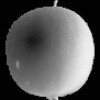

In [3]:
fruits[0] ## 배

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=uint8)
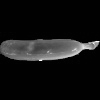

In [4]:
fruits[200] ## 바나나

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=uint8)
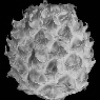

In [5]:
fruits[100] # 파인애플

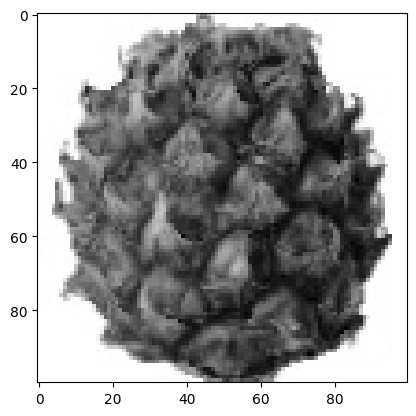

In [8]:
plt.imshow(fruits[100],cmap='gray_r')
plt.show()

In [11]:
fruits[100, 50, :]

array([  3,   2,   2,   1,   2, 109,  79,  16,   1,  54, 114, 136, 131,
       120, 120, 127, 138, 139, 110,  84,  84,  89, 114, 148, 121, 121,
       133, 149, 140, 123, 133, 144, 112,  70,  88, 118, 120, 129, 137,
       131, 135, 144, 121, 128, 157, 164, 177, 175, 177, 182, 174, 158,
       150, 142, 148, 157, 134, 113, 104, 139, 117, 110, 122, 127, 129,
       143, 175, 186, 196, 191, 180, 175, 169, 167, 176, 184, 176, 181,
       177, 173, 167, 177, 187, 146, 180, 188, 193, 199, 183, 172, 103,
        61, 110,  72,   2,   3,   1,   1,   1,   1], dtype=uint8)

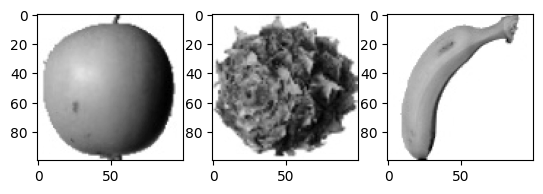

In [17]:
plt.subplot(1,3,1)
plt.imshow(fruits[10],cmap='gray_r')
plt.subplot(1,3,2)
plt.imshow(fruits[110],cmap='gray_r')
plt.subplot(1,3,3)
plt.imshow(fruits[210],cmap='gray_r')
plt.show()


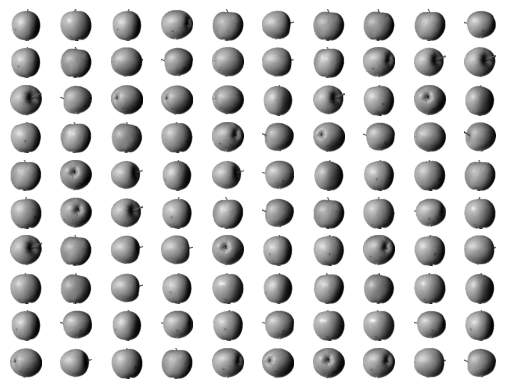

In [19]:
for i in range(100):
  plt.subplot(10,10,i+1)
  plt.imshow(fruits[i],cmap='gray_r')
  plt.axis('off')
plt.show()



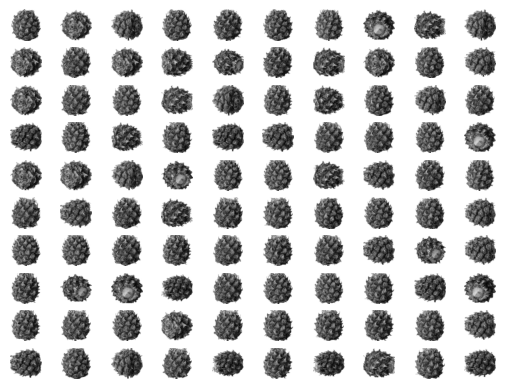

In [20]:
for i in range(100):
  plt.subplot(10,10,i+1)
  plt.imshow(fruits[i+100],cmap='gray_r')
  plt.axis('off')
plt.show()

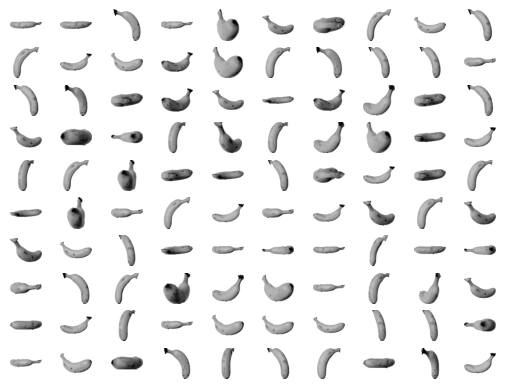

In [21]:
for i in range(100):
  plt.subplot(10,10,i+1)
  plt.imshow(fruits[i+200],cmap='gray_r')
  plt.axis('off')
plt.show()

이미지 픽셀 데이터를 가지고 비슷한(같은 부류) 이미지를 분류 - 클러스터링 - 군집
  - 같은 종류의 군집(이미지)의 픽셀값의 평균
  - 분류 작업을 할때 각 이미지의 평균값과 군집의 평균값을 비교해서 가장 오차가 작은 군집에 포함된다.

In [28]:
# 각 군집의 평균을 구하세요
fruits_mean = np.mean(fruits,axis=0)  ## (차원 , 행 , 열) ## axis를 적용할때 (0, 1, 2) 로 적용한다
fruits_mean.shape

(100, 100)

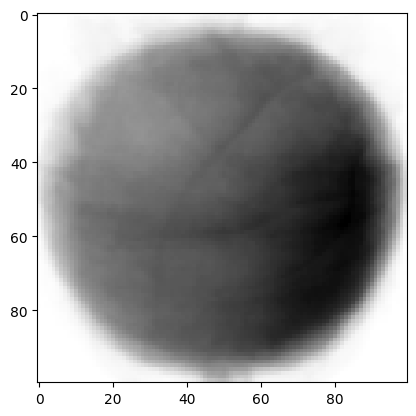

In [29]:
plt.imshow(fruits_mean,cmap='gray_r')
plt.show()

In [54]:
# 각 군집의 평균을 구하세요
# 0~99 까지의 데이터 -평균
fruits_1_data =fruits[:100].mean(axis=0)
fruits_2_data =fruits[100:200].mean(axis=0)
fruits_3_data =fruits[200:].mean(axis=0)
mean_each_fruit = np.mean(fruits_1_data), np.mean(fruits_2_data),np.mean(fruits_3_data)
mean_each_fruit # 사과들의 평균 픽셀값, 파인애플, 바나나

(92.98773600000001, 96.260623, 34.597277)

In [64]:
sample_1= np.array(
    [
        [[1,1,1],[2,2,2]],
        [[3,3,3],[4,4,4]],
        [[5,5,5],[6,6,6]],
        [[7,7,7],[8,8,8]],
        [[9,9,9],[10,10,10]]
    ]
)
sample_1.shape, sample_1.mean(axis=0), sample_1.mean(axis=1), sample_1.mean(axis=2), sample_1.mean(axis=(0,2))

((5, 2, 3),
 array([[5., 5., 5.],
        [6., 6., 6.]]),
 array([[1.5, 1.5, 1.5],
        [3.5, 3.5, 3.5],
        [5.5, 5.5, 5.5],
        [7.5, 7.5, 7.5],
        [9.5, 9.5, 9.5]]),
 array([[ 1.,  2.],
        [ 3.,  4.],
        [ 5.,  6.],
        [ 7.,  8.],
        [ 9., 10.]]),
 array([5., 6.]))

In [ ]:
# 평규값과 가까운 사진 고르기 - 분류하기 -군집

In [34]:
np.random.randint(0,100,30).reshape(3,10).mean(axis=0)

array([16.        , 24.33333333, 56.        , 39.        , 30.33333333,
       63.66666667, 43.        , 72.33333333, 70.        , 39.66666667])

In [51]:
fruits_apple_mean = np.mean(fruits[:100],axis=0)
fruits_pineapple_mean = np.mean(fruits[100:200],axis=0)
fruits_banana_mean = np.mean(fruits[200:],axis=0)
np.mean(fruits_apple_mean), np.mean(fruits_pineapple_mean),np.mean(fruits_banana_mean)

(92.98773600000001, 96.260623, 34.597277)

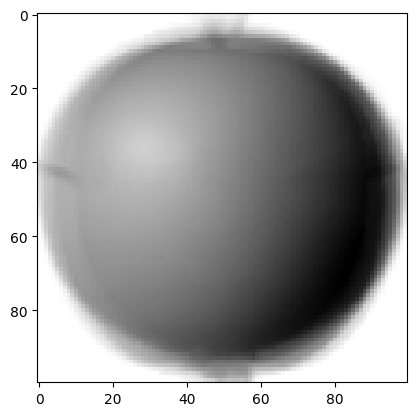

In [40]:
plt.imshow(fruits_apple_mean,cmap='gray_r')
plt.show()

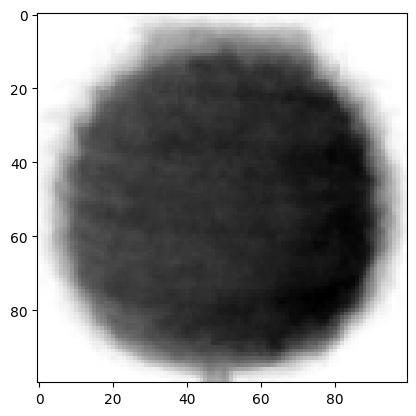

In [46]:
plt.imshow(fruits_pineapple_mean,cmap='gray_r')
plt.show()

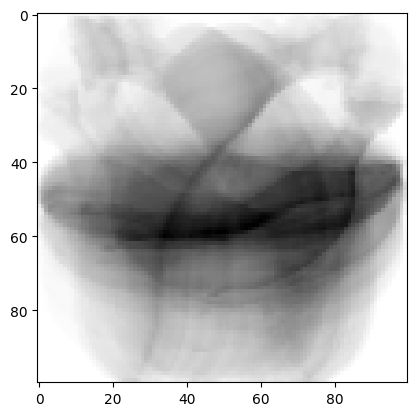

In [45]:
plt.imshow(fruits_banana_mean,cmap='gray_r')
plt.show()

In [52]:
# 5,3,2 30
temp = np.random.randint(0,100,size=(5,3,2))
temp.mean(axis=(1,2))

array([58.33333333, 43.        , 49.        , 38.66666667, 53.5       ])

In [53]:
# 2차원 이미지의 평균값 == 300
fruits_mean = np.mean(fruits,axis=(1,2))
fruits_mean.shape

(300,)

In [69]:
# mean_each_fruit이 기준이고 이 기준과 각 평균값과의 차이가 가장 작은 기준은
print(np.abs(mean_each_fruit - fruits_mean[200])) # 각 군집의 평균과 대상의 평균의 차이를 구한다.(절대값)
np.argmin(np.abs(mean_each_fruit - fruits_mean[200])) # 그 차이가 가장 작은 인덱스

[73.439036 76.711923 15.048577]


2

In [72]:
np.array(mean_each_fruit).shape , fruits_mean.shape

((3,), (300,))

In [73]:
fruits_mean = fruits_mean.reshape(-1,1)
fruits_mean.shape

(300, 1)

In [75]:
np.abs(fruits_mean -np.array(mean_each_fruit)).shape

(300, 3)

In [76]:
temp = np.abs(fruits_mean -np.array(mean_each_fruit))
temp.shape

(300, 3)

In [85]:
predict_class = np.argmin(temp, axis=1)
predict_class

array([0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [86]:
# class 가 0인 항목 몇개?
print(np.sum(result_class==0))
# class 가 1인 항목 몇개?
print(np.sum(result_class==1))
# class 가 2인 항목 몇개?
print(np.sum(result_class==2))

82
120
98


In [87]:
y = np.array([0]*100 + [1]*100 + [2]*100)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [88]:
from sklearn.metrics import accuracy_score
accuracy_score(y,predict_class)

0.7733333333333333

In [92]:
y == predict_class

array([ True, False,  True, False,  True,  True,  True, False,  True,
        True,  True, False,  True,  True, False,  True,  True, False,
        True, False, False,  True, False, False,  True,  True, False,
        True, False, False,  True,  True, False, False, False,  True,
       False,  True, False, False,  True, False,  True,  True,  True,
        True, False,  True, False,  True, False, False, False,  True,
        True,  True,  True, False,  True, False, False,  True,  True,
        True, False,  True,  True, False,  True,  True, False, False,
        True,  True, False,  True,  True, False, False,  True,  True,
        True,  True,  True,  True,  True, False, False,  True,  True,
       False,  True, False,  True, False, False, False, False,  True,
        True,  True, False,  True,  True,  True,  True,  True, False,
        True,  True, False,  True, False,  True, False,  True,  True,
       False,  True, False, False,  True,  True,  True,  True,  True,
        True,  True,

In [95]:
sum(y == predict_class) / len(y)

0.7733333333333333

In [97]:
sum(y == predict_class) # 맞은 갯수

232

In [96]:
len(y) - sum(y == predict_class) # 틀린 갯수

68

k-means 적용

In [93]:
from sklearn.cluster import KMeans

In [103]:
km = KMeans(n_clusters=3, n_init='auto')
print(fruits.shape, np.ndim(fruits))
# km.fit(fruits) # ValueError: Found array with dim 3. KMeans expected <= 2.

(300, 100, 100) 3


In [101]:
# 차수를 변경할 때는 reshape를 사용한다.
fruits_reshaped = fruits.reshape(-1, 100*100)
fruits_reshaped.shape

(300, 10000)

In [104]:
km.fit(fruits_reshaped)

KMeans(n_clusters=3, n_init='auto')

In [105]:
km.labels_

array([0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], d

In [106]:
y = np.array([0]*100 + [2]*100 + [1]*100)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [107]:
y_predict = km.predict(fruits_reshaped)
y = np.array([0]*100 + [2]*100 + [1]*100)
accuracy_score(y,y_predict)

0.9633333333333334

In [109]:
km.labels_ == y

array([ True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True, False,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [111]:
sum(km.labels_ == y) / len(y)

0.9633333333333334

In [112]:
sum(km.labels_ == y) # 맞춘개수

289

In [113]:
len(y) - sum(km.labels_ == y) # 틀린개수

11

In [114]:
pip install ucimlrepo

In [115]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
online_retail = fetch_ucirepo(id=352)

# data (as pandas dataframes)
X = online_retail.data.features
y = online_retail.data.targets

# metadata
print(online_retail.metadata)

# variable information
print(online_retail.variables)


{'uci_id': 352, 'name': 'Online Retail', 'repository_url': 'https://archive.ics.uci.edu/dataset/352/online+retail', 'data_url': 'https://archive.ics.uci.edu/static/public/352/data.csv', 'abstract': 'This is a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.', 'area': 'Business', 'tasks': ['Classification', 'Clustering'], 'characteristics': ['Multivariate', 'Sequential', 'Time-Series'], 'num_instances': 541909, 'num_features': 6, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': None, 'index_col': ['InvoiceNo', 'StockCode'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2015, 'last_updated': 'Fri Jan 05 2024', 'dataset_doi': '10.24432/C5BW33', 'creators': ['Daqing Chen'], 'intro_paper': {'title': 'Data mining for the online retail industry: A case study of RFM model-based customer segmentation using data mining', 'aut

In [116]:
X

,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...
541904,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [118]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Description  540455 non-null  object 
 1   Quantity     541909 non-null  int64  
 2   InvoiceDate  541909 non-null  object 
 3   UnitPrice    541909 non-null  float64
 4   CustomerID   406829 non-null  float64
 5   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(3)
memory usage: 24.8+ MB


In [122]:
X = X.dropna()

In [123]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Description  406829 non-null  object 
 1   Quantity     406829 non-null  int64  
 2   InvoiceDate  406829 non-null  object 
 3   UnitPrice    406829 non-null  float64
 4   CustomerID   406829 non-null  float64
 5   Country      406829 non-null  object 
dtypes: float64(2), int64(1), object(3)
memory usage: 21.7+ MB


In [124]:
pip install ucimlrepo

In [4]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition = fetch_ucirepo(id=544)

# data (as pandas dataframes)
X = estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition.data.features
y = estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition.data.targets

# metadata
print(estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition.metadata)

# variable information
print(estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition.variables)


{'uci_id': 544, 'name': 'Estimation of Obesity Levels Based On Eating Habits and Physical Condition ', 'repository_url': 'https://archive.ics.uci.edu/dataset/544/estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition', 'data_url': 'https://archive.ics.uci.edu/static/public/544/data.csv', 'abstract': 'This dataset include data for the estimation of obesity levels in individuals from the countries of Mexico, Peru and Colombia, based on their eating habits and physical condition. ', 'area': 'Health and Medicine', 'tasks': ['Classification', 'Regression', 'Clustering'], 'characteristics': ['Multivariate'], 'num_instances': 2111, 'num_features': 16, 'feature_types': ['Integer'], 'demographics': ['Gender', 'Age'], 'target_col': ['NObeyesdad'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2019, 'last_updated': 'Mon Feb 26 2024', 'dataset_doi': '10.24432/C5H31Z', 'creators': [], 'intro_paper': {'title': 'Dataset f

In [5]:
X

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation


In [6]:
y

,NObeyesdad
0,Normal_Weight
1,Normal_Weight
2,Normal_Weight
3,Overweight_Level_I
4,Overweight_Level_II
...,...
2106,Obesity_Type_III
2107,Obesity_Type_III
2108,Obesity_Type_III
2109,Obesity_Type_III


In [7]:
# 데이터 전처리
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [8]:
# 범주형 데이터 object 타입의 데이터를 인코딩
from sklearn.preprocessing import LabelEncoder
# 범주형 피처 선택
object_columns = X.select_dtypes(include=['object']).columns
print(object_columns)

Index(['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE',
       'SCC', 'CALC', 'MTRANS'],
      dtype='object')


In [9]:
# 범주형 피처 인코딩
label_encoder = LabelEncoder()
for column in object_columns:
    X[column] = label_encoder.fit_transform(X[column])

<ipython-input-9-8d59b721cf44>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[column] = label_encoder.fit_transform(X[column])
<ipython-input-9-8d59b721cf44>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[column] = label_encoder.fit_transform(X[column])
<ipython-input-9-8d59b721cf44>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pan

In [10]:

# for cols in X.select_dtypes(include=['object']).columns:
#   print(cols)
#   X.loc[:,cols] = X[cols].astype('int')

In [11]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   int64  
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   int64  
 5   FAVC                            2111 non-null   int64  
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   int64  
 9   SMOKE                           2111 non-null   int64  
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   int64  
 12  FAF                             21

In [12]:
X

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,0,21.000000,1.620000,64.000000,1,0,2.0,3.0,2,0,2.000000,0,0.000000,1.000000,3,3
1,0,21.000000,1.520000,56.000000,1,0,3.0,3.0,2,1,3.000000,1,3.000000,0.000000,2,3
2,1,23.000000,1.800000,77.000000,1,0,2.0,3.0,2,0,2.000000,0,2.000000,1.000000,1,3
3,1,27.000000,1.800000,87.000000,0,0,3.0,3.0,2,0,2.000000,0,2.000000,0.000000,1,4
4,1,22.000000,1.780000,89.800000,0,0,2.0,1.0,2,0,2.000000,0,0.000000,0.000000,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0,20.976842,1.710730,131.408528,1,1,3.0,3.0,2,0,1.728139,0,1.676269,0.906247,2,3
2107,0,21.982942,1.748584,133.742943,1,1,3.0,3.0,2,0,2.005130,0,1.341390,0.599270,2,3
2108,0,22.524036,1.752206,133.689352,1,1,3.0,3.0,2,0,2.054193,0,1.414209,0.646288,2,3
2109,0,24.361936,1.739450,133.346641,1,1,3.0,3.0,2,0,2.852339,0,1.139107,0.586035,2,3


In [13]:
X.describe()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,0.505921,24.312600,1.701677,86.586058,0.817622,0.883941,2.419043,2.685628,1.859308,0.020843,2.008011,0.045476,1.010298,0.657866,2.268593,2.365230
std,0.500083,6.345968,0.093305,26.191172,0.386247,0.320371,0.533927,0.778039,0.468543,0.142893,0.612953,0.208395,0.850592,0.608927,0.515498,1.261423
min,0.000000,14.000000,1.450000,39.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,19.947192,1.630000,65.473343,1.000000,1.000000,2.000000,2.658738,2.000000,0.000000,1.584812,0.000000,0.124505,0.000000,2.000000,3.000000
50%,1.000000,22.777890,1.700499,83.000000,1.000000,1.000000,2.385502,3.000000,2.000000,0.000000,2.000000,0.000000,1.000000,0.625350,2.000000,3.000000
75%,1.000000,26.000000,1.768464,107.430682,1.000000,1.000000,3.000000,3.000000,2.000000,0.000000,2.477420,0.000000,1.666678,1.000000,3.000000,3.000000
max,1.000000,61.000000,1.980000,173.000000,1.000000,1.000000,3.000000,4.000000,3.000000,1.000000,3.000000,1.000000,3.000000,2.000000,3.000000,4.000000


In [14]:
import pandas as pd
y=pd.DataFrame(y)

In [15]:
# y[0].unique()  # Incorrect: Tries to access a column named '0'

# Correct way to access the first (and only) column:
y.iloc[:, 0].unique()

array(['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
       'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II',
       'Obesity_Type_III'], dtype=object)

In [16]:
len(y.iloc[:, 0].unique())

7

In [17]:
# 스케일링
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

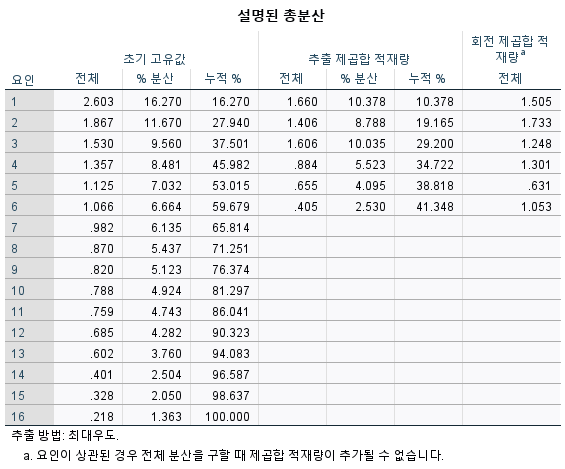

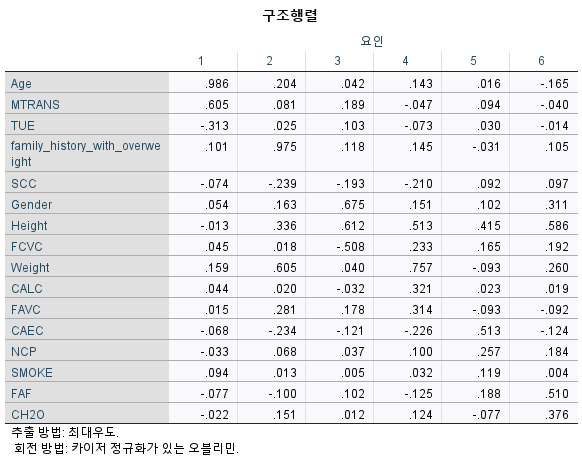

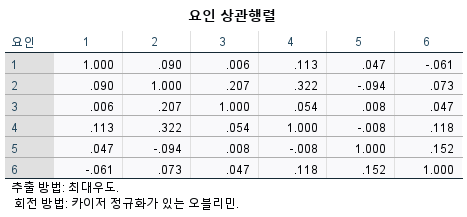

In [54]:
km = KMeans(n_clusters=6, n_init='auto')
km.fit(X_scaled)

KMeans(n_clusters=6, n_init='auto')

In [55]:
X['cluster'] = km.predict(X_scaled)

In [56]:
X.groupby('cluster').mean()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
cluster,,,,,,,,,,,,,,,,
0,0.990499,23.212434,1.800305,100.228626,0.985748,0.964371,2.240314,2.824611,1.919240,0.038005,2.153401,0.000000,1.102799,0.549196,2.009501,2.933492
1,0.000000,23.276556,1.685421,116.572490,1.000000,0.997191,2.945984,3.001022,2.011236,0.002809,2.198262,0.000000,0.669046,0.614170,1.977528,3.000000
2,0.293375,20.685475,1.646498,56.717970,0.154574,0.640379,2.497018,2.854971,1.476341,0.037855,1.774918,0.264984,1.246430,0.631030,2.173502,2.757098
3,0.589421,21.060564,1.694401,71.701250,0.957179,0.848866,2.236739,3.089605,1.760705,0.005038,1.960656,0.002519,1.301611,1.028762,2.760705,2.690176
4,0.617188,34.419143,1.703222,91.298055,0.934896,0.932292,2.350934,2.615856,1.929688,0.023438,1.912605,0.005208,0.885206,0.403921,2.239583,0.098958
5,0.368644,21.736100,1.634101,74.507054,0.707627,0.877119,2.255758,1.168424,2.088983,0.016949,2.009656,0.038136,0.756366,0.742958,2.516949,3.008475


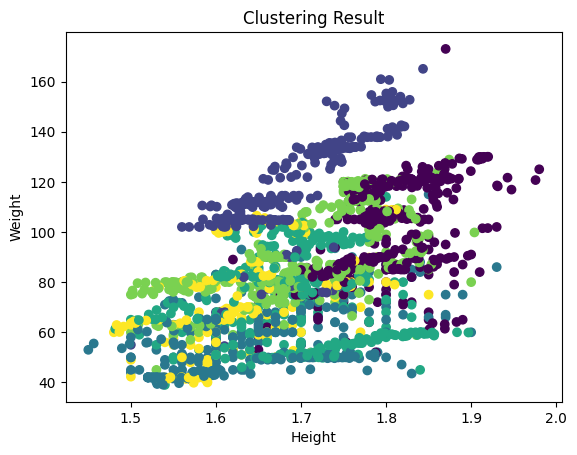

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.scatter(x = X['Height'],y=X['Weight'], c=X['cluster'])
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('Clustering Result')
plt.show()

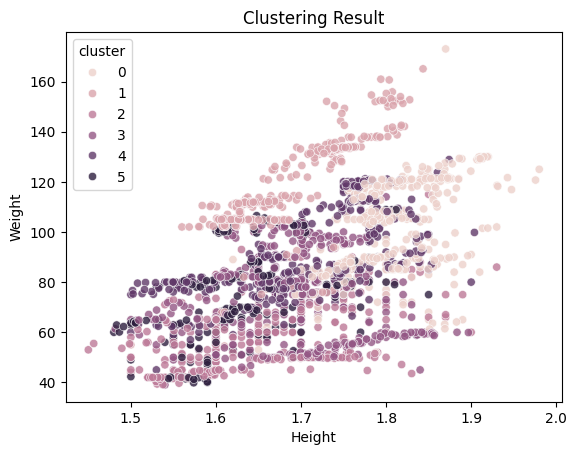

In [58]:
sns.scatterplot(x='Height', y='Weight', hue='cluster', data=X, alpha=0.8)
plt.title('Clustering Result')
plt.show()

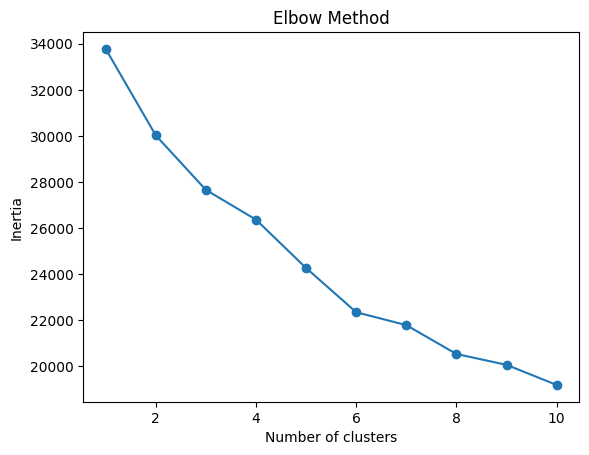

In [59]:
# 최적의 k개수 엘보우 기법
from sklearn.cluster import KMeans # Import KMeans

inertia = []
for k in range(1, 11):
    km = KMeans(n_clusters=k, n_init='auto')
    km.fit(X_scaled)
    inertia.append(km.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

In [60]:
km.labels_

array([8, 5, 8, ..., 0, 0, 0], dtype=int32)

In [61]:
len(km.labels_)

2111

In [62]:
km.labels_.shape

(2111,)

In [63]:
y

,NObeyesdad
0,Normal_Weight
1,Normal_Weight
2,Normal_Weight
3,Overweight_Level_I
4,Overweight_Level_II
...,...
2106,Obesity_Type_III
2107,Obesity_Type_III
2108,Obesity_Type_III
2109,Obesity_Type_III
